# test

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
df = pd.read_csv("doge_coin_dataset_2021_final_set.csv", parse_dates= {"date" : ["year","month","day"]},keep_date_col=True, index_col="date")
df


,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source,cleaned_tweet,predicted_labels,hugging_labels
date,,,,,,,,,,,,
2021-01-31,1.360000e+18,3.134341e+09,Nobody,"You can’t stop us, you fucks #dogecoin https:/...",2021,1,31,22:50:54,Twitter for iPhone,"you can’t stop us, you fucks #dogecoin",0,-1
2021-01-31,1.360000e+18,1.320000e+18,Nobody,https://t.co/EGyJXssO6l\n\nLet's share it to t...,2021,1,31,23:28:43,Twitter for Android,let's share it to the entire social network to...,0,1
2021-01-31,1.360000e+18,1.290000e+18,Nobody,#dogecoin is sounding more and more like essen...,2021,1,31,23:28:34,Twitter for Android,#dogecoin is sounding more and more like essen...,0,-1
2021-01-31,1.360000e+18,1.360000e+18,Nobody,to spread the past week and xrp link https t h...,2021,1,31,23:28:31,Error-log,to spread the past week and xrp link https t h...,0,0
2021-01-31,1.360000e+18,1.350000e+18,Nobody,If every owner that owns a dog would put 10$ i...,2021,1,31,23:28:27,Twitter for iPhone,if every owner that owns a dog would put 10$ i...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,1.470000e+18,1.420000e+18,Nobody,UK's Advertising Authority Orders Arsenal to R...,2021,12,23,09:50:00,TweetDeck,uk's advertising authority orders arsenal to r...,0,0
2021-12-23,1.470000e+18,1.390000e+18,Nobody,DOGE is at 0.176 USD [04:50]\nFollow to get pr...,2021,12,23,09:50:10,Twitter,doge is at 0.176 usd [04:50] follow to get pri...,0,0
2021-12-23,1.470000e+18,1.440000e+18,Nobody,"🐕🪙🐋🚨\n\n4,500,058 $DOGE ($797,320 USD) was tra...",2021,12,23,09:50:50,Twitter,"🪙 4,500,058 $doge ($797,320 usd) was transferr...",0,0


In [3]:
df.index

DatetimeIndex(['2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31',
               '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31',
               '2021-01-31', '2021-01-31',
               ...
               '2021-12-23', '2021-12-23', '2021-12-23', '2021-12-23',
               '2021-12-23', '2021-12-23', '2021-12-23', '2021-12-23',
               '2021-12-23', '2021-12-23'],
              dtype='datetime64[ns]', name='date', length=45760, freq=None)

In [4]:
df['hugging_labels'] = df['hugging_labels'].replace([0,1,-1],['neutral','positive','negative'])


In [57]:
yearly = df[df.index.year == 2021]
yearly

,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source,cleaned_tweet,predicted_labels,hugging_labels
date,,,,,,,,,,,,
2021-01-31,1.360000e+18,3.134341e+09,Nobody,"You can’t stop us, you fucks #dogecoin https:/...",2021,1,31,22:50:54,Twitter for iPhone,"you can’t stop us, you fucks #dogecoin",0,negative
2021-01-31,1.360000e+18,1.320000e+18,Nobody,https://t.co/EGyJXssO6l\n\nLet's share it to t...,2021,1,31,23:28:43,Twitter for Android,let's share it to the entire social network to...,0,positive
2021-01-31,1.360000e+18,1.290000e+18,Nobody,#dogecoin is sounding more and more like essen...,2021,1,31,23:28:34,Twitter for Android,#dogecoin is sounding more and more like essen...,0,negative
2021-01-31,1.360000e+18,1.360000e+18,Nobody,to spread the past week and xrp link https t h...,2021,1,31,23:28:31,Error-log,to spread the past week and xrp link https t h...,0,neutral
2021-01-31,1.360000e+18,1.350000e+18,Nobody,If every owner that owns a dog would put 10$ i...,2021,1,31,23:28:27,Twitter for iPhone,if every owner that owns a dog would put 10$ i...,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,1.470000e+18,1.420000e+18,Nobody,UK's Advertising Authority Orders Arsenal to R...,2021,12,23,09:50:00,TweetDeck,uk's advertising authority orders arsenal to r...,0,neutral
2021-12-23,1.470000e+18,1.390000e+18,Nobody,DOGE is at 0.176 USD [04:50]\nFollow to get pr...,2021,12,23,09:50:10,Twitter,doge is at 0.176 usd [04:50] follow to get pri...,0,neutral
2021-12-23,1.470000e+18,1.440000e+18,Nobody,"🐕🪙🐋🚨\n\n4,500,058 $DOGE ($797,320 USD) was tra...",2021,12,23,09:50:50,Twitter,"🪙 4,500,058 $doge ($797,320 usd) was transferr...",0,neutral


In [58]:
monthly = df[df.index.month == 1]
monthly

,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source,cleaned_tweet,predicted_labels,hugging_labels
date,,,,,,,,,,,,
2021-01-31,1.360000e+18,3.134341e+09,Nobody,"You can’t stop us, you fucks #dogecoin https:/...",2021,1,31,22:50:54,Twitter for iPhone,"you can’t stop us, you fucks #dogecoin",0,negative
2021-01-31,1.360000e+18,1.320000e+18,Nobody,https://t.co/EGyJXssO6l\n\nLet's share it to t...,2021,1,31,23:28:43,Twitter for Android,let's share it to the entire social network to...,0,positive
2021-01-31,1.360000e+18,1.290000e+18,Nobody,#dogecoin is sounding more and more like essen...,2021,1,31,23:28:34,Twitter for Android,#dogecoin is sounding more and more like essen...,0,negative
2021-01-31,1.360000e+18,1.360000e+18,Nobody,to spread the past week and xrp link https t h...,2021,1,31,23:28:31,Error-log,to spread the past week and xrp link https t h...,0,neutral
2021-01-31,1.360000e+18,1.350000e+18,Nobody,If every owner that owns a dog would put 10$ i...,2021,1,31,23:28:27,Twitter for iPhone,if every owner that owns a dog would put 10$ i...,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31,1.360000e+18,4.301066e+07,Nobody,The Netflix of wealth? $100/week commitment to...,2021,1,31,21:48:05,Twitter for iPhone,the netflix of wealth? $100/week commitment to...,-1,positive
2021-01-31,1.360000e+18,1.270000e+18,Nobody,BUY AND HOLD #Dogecoinarmy #dogecoin #dogecoin...,2021,1,31,21:48:38,Twitter for iPhone,buy and hold #dogecoinarmy #dogecoin #dogecoin...,0,neutral
2021-01-31,1.360000e+18,1.340000e+18,Nobody,I’m holding my 44 k #dogecoin to 1$ 🔥 #dogecoi...,2021,1,31,21:48:25,Twitter for iPhone,i’m holding my 44 k #dogecoin to 1$ #dogecoina...,0,neutral


In [59]:
aggregation = {'#_of_tweets': ('tweet_id', 'count')}
df_sentiment_by_time = yearly.groupby(['date', 'hugging_labels']).agg(**aggregation).reset_index()
#df_sentiment_by_time['date'] = pd.to_datetime(df_sentiment_by_time['date']).dt.date

df_sentiment_by_time

,date,hugging_labels,#_of_tweets
0,2021-01-31,negative,251
1,2021-01-31,neutral,1267
2,2021-01-31,positive,1100
3,2021-02-04,negative,207
4,2021-02-04,neutral,831
...,...,...,...
160,2021-12-14,neutral,301
161,2021-12-14,positive,251
162,2021-12-23,negative,15
163,2021-12-23,neutral,198


In [60]:
df_sentiment_by_month = df_sentiment_by_time.groupby(df_sentiment_by_time.date.dt.month).apply(lambda df_sentiment_by_time: df_sentiment_by_time.groupby('hugging_labels')['#_of_tweets'].agg({'sum'})).unstack()

df_sentiment_by_month

sum                 
hugging_labels negative neutral positive
date                                    
1                   251    1267     1100
2                  1443    6871     6383
3                   890    5708     6027
4                   161     847      870
5                   617    2707     2483
7                   185    1076      902
8                    61     452      341
9                    65     614      644
10                  159     873      728
11                   89     532      473
12                   69     499      373

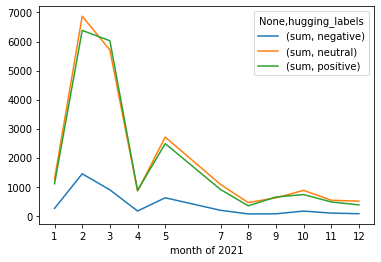

In [ ]:
df_sentiment_by_month.plot(xlabel="month of 2021", xticks=df_sentiment_by_month.index)

In [53]:
months = {
  1: "January",
  2: "February",
  3: "March",
  4: "April",
  5: "May",
  7: "July",
  8: "August",
  9: "September",
  10: "October",
  11: "November",
  12: "December",
}
def month_label(month_number):
  month_str = months[month_number]
  return month_str

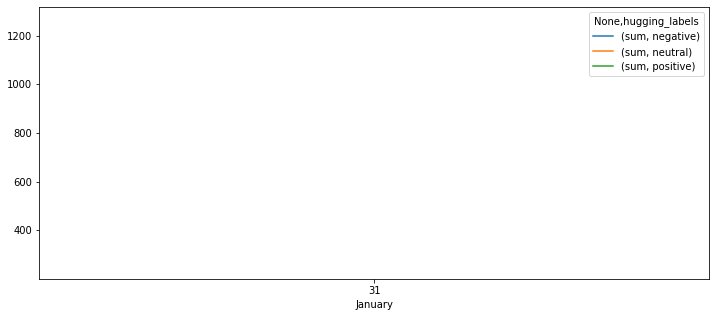

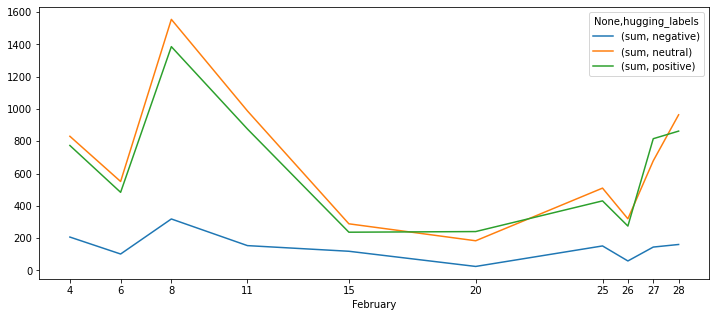

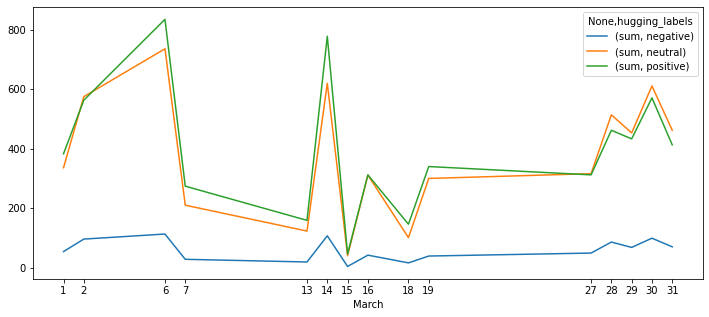

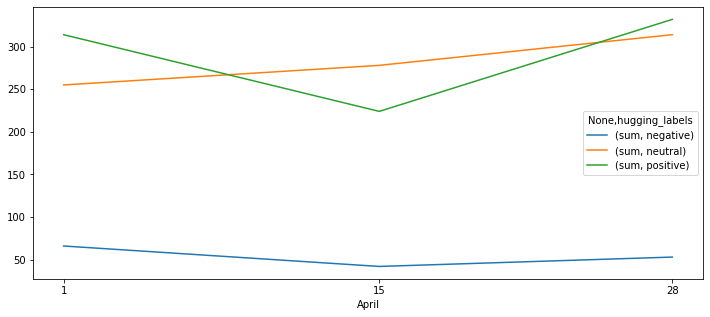

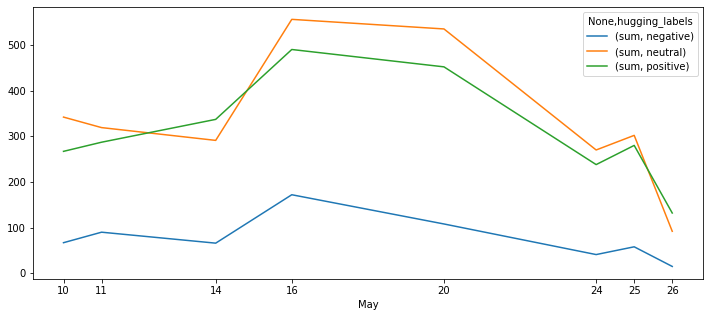

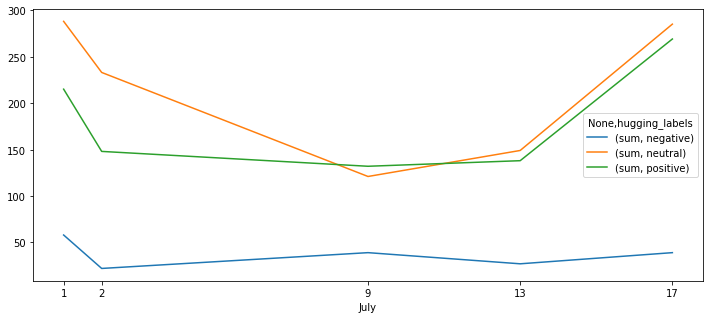

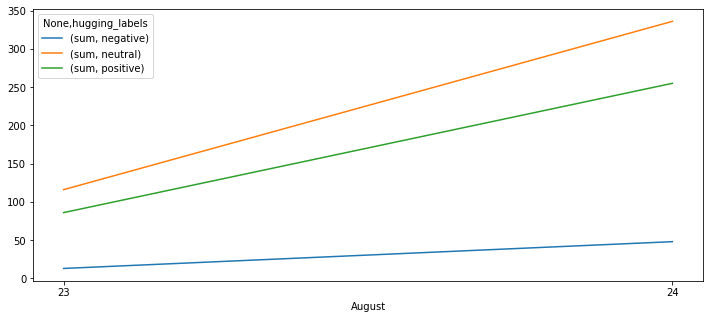

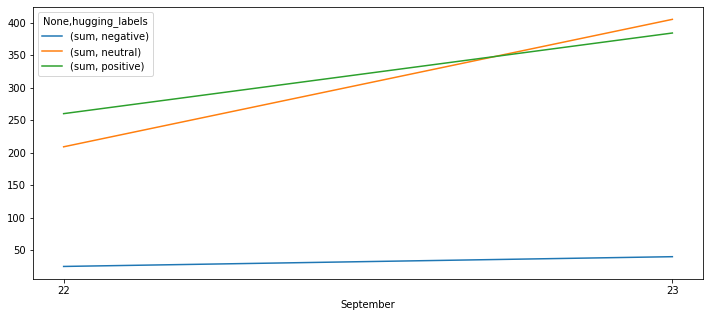

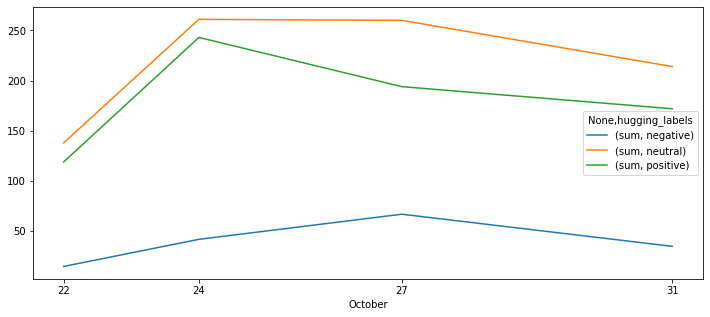

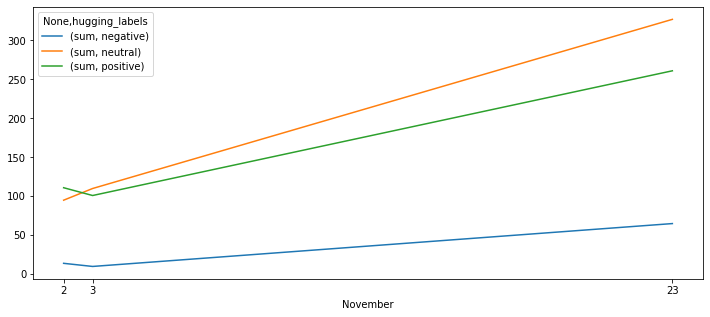

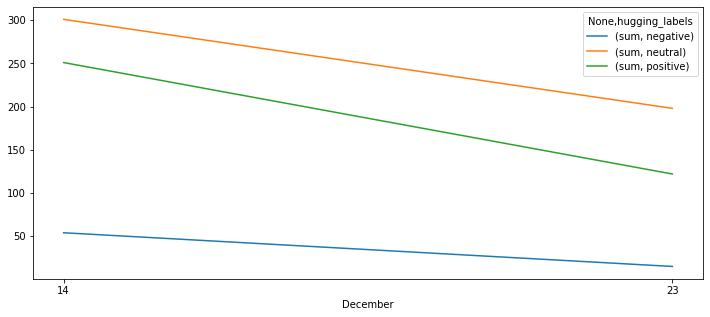

In [61]:
for i in df_sentiment_by_month.index:
  monthly = df[df.index.month == i]

  aggregation = {'#_of_tweets': ('tweet_id', 'count')}
  df_sentiment_by_time = monthly.groupby(['date', 'hugging_labels']).agg(**aggregation).reset_index()
  
  df_sentiment_by_day = df_sentiment_by_time.groupby(df_sentiment_by_time.date.dt.day).apply(lambda df_sentiment_by_time: df_sentiment_by_time.groupby('hugging_labels')['#_of_tweets'].agg({'sum'})).unstack()

  #print(df_sentiment_by_day)
  df_sentiment_by_day.plot(xlabel=month_label(i), xticks=df_sentiment_by_day.index, figsize=(12,5))


# complete code

In [6]:
# import tools
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# csv path
path = "doge_coin_dataset_2021_final_set.csv"

# import data and  relabel numerical sentiment with strings
df = pd.read_csv(path, parse_dates= {"date" : ["year","month","day"]},keep_date_col=True, index_col="date")
df['hugging_labels'] = df['hugging_labels'].replace([0,1,-1],['neutral','positive','negative'])

# set year (and month) if needed
this_year = 2021
yearly = df[df.index.year == this_year]
#monthly = df[df.index.month == 1]

In [7]:
# number of tweets per label and date
aggregation = {'#_of_tweets': ('tweet_id', 'count')}
df_sentiment_over_year = yearly.groupby(['date', 'hugging_labels']).agg(**aggregation).reset_index()
df_sentiment_over_year

,date,hugging_labels,#_of_tweets
0,2021-01-31,negative,251
1,2021-01-31,neutral,1267
2,2021-01-31,positive,1100
3,2021-02-04,negative,207
4,2021-02-04,neutral,831
...,...,...,...
160,2021-12-14,neutral,301
161,2021-12-14,positive,251
162,2021-12-23,negative,15
163,2021-12-23,neutral,198


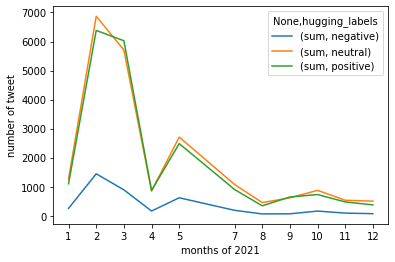

In [8]:
df_sentiment_by_month = df_sentiment_over_year.groupby(df_sentiment_over_year.date.dt.month).apply(lambda df_sentiment_over_year: df_sentiment_over_year.groupby('hugging_labels')['#_of_tweets'].agg({'sum'})).unstack()
df_sentiment_by_month.plot(xlabel="months of {}".format(this_year), xticks=df_sentiment_by_month.index, ylabel="number of tweet")

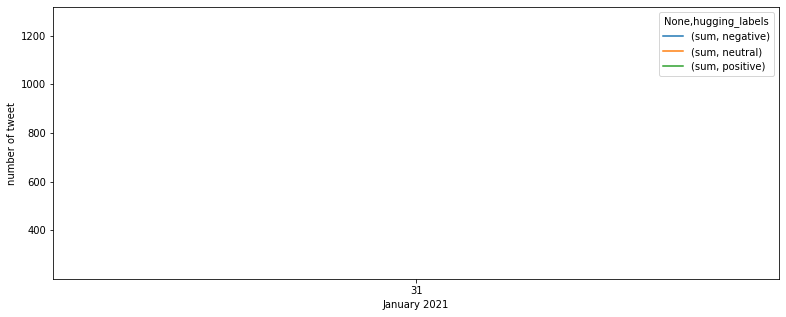

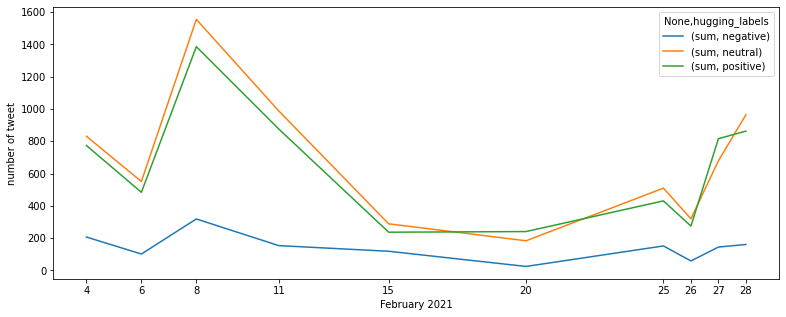

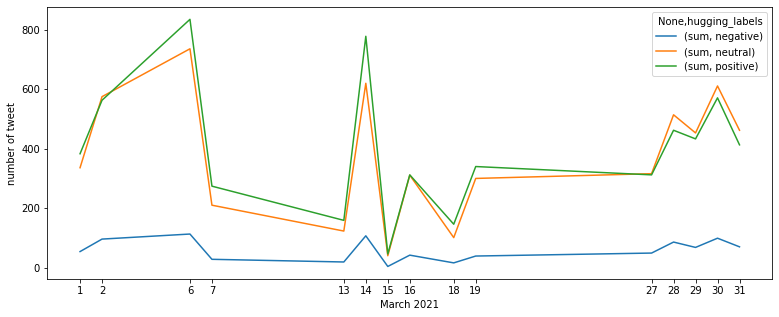

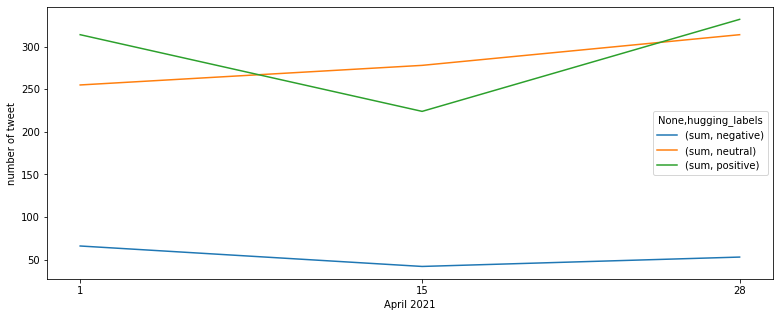

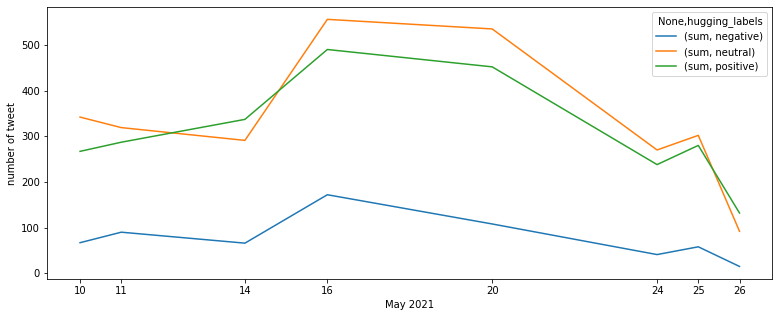

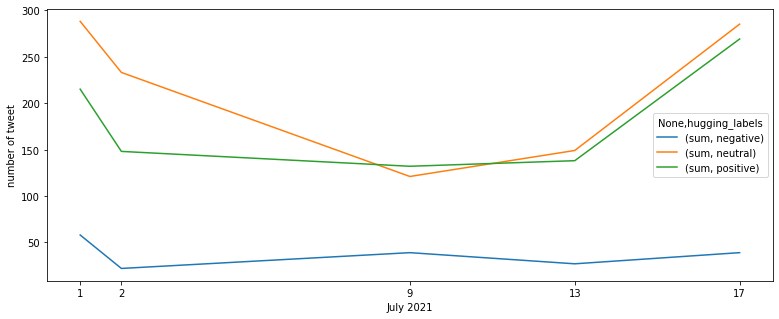

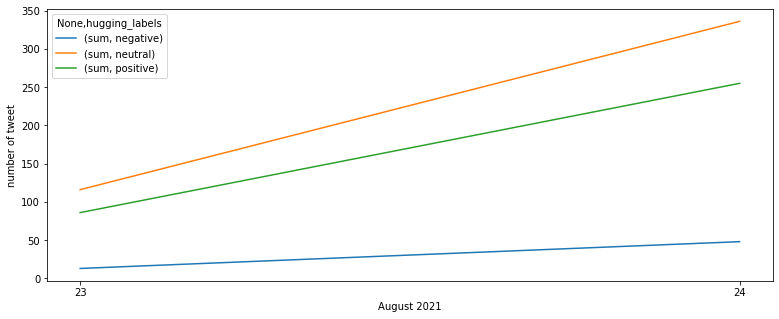

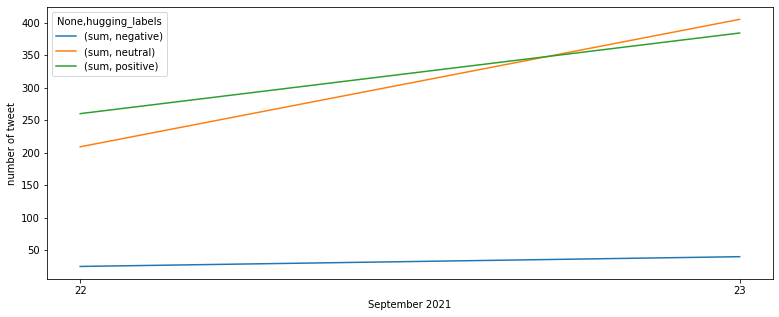

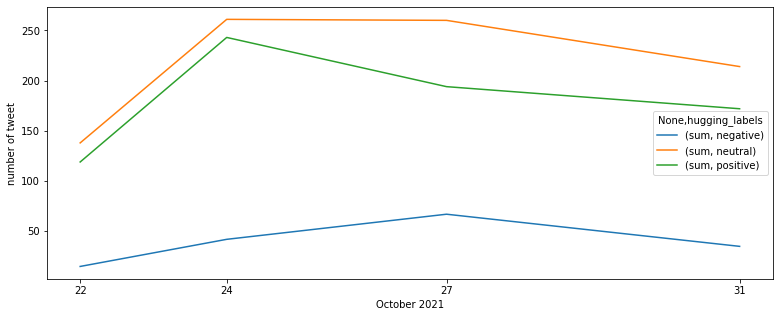

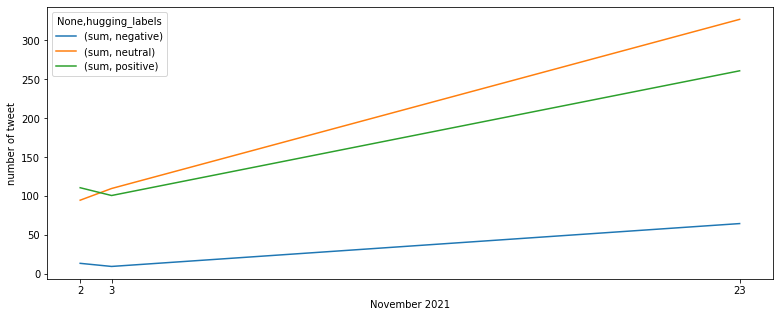

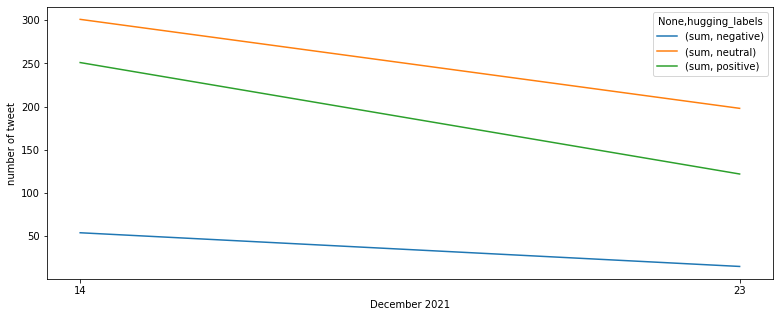

In [9]:
months = {
  1: "January",
  2: "February",
  3: "March",
  4: "April",
  5: "May",
  7: "July",
  8: "August",
  9: "September",
  10: "October",
  11: "November",
  12: "December",
}
def month_label(month_number):
  month_str = months[month_number]
  return month_str + " " + str(this_year)


for i in df_sentiment_by_month.index:
  monthly = df[df.index.month == i]

  aggregation = {'#_of_tweets': ('tweet_id', 'count')}
  df_sentiment_by_time = monthly.groupby(['date', 'hugging_labels']).agg(**aggregation).reset_index()
  
  df_sentiment_by_day = df_sentiment_by_time.groupby(df_sentiment_by_time.date.dt.day).apply(lambda df_sentiment_by_time: df_sentiment_by_time.groupby('hugging_labels')['#_of_tweets'].agg({'sum'})).unstack()

  #print(df_sentiment_by_day)
  df_sentiment_by_day.plot(xlabel=month_label(i), xticks=df_sentiment_by_day.index, ylabel="number of tweet", figsize=(13,5))
  

        date hugging_labels  #_of_tweets
0 2021-01-31       negative          251
1 2021-01-31        neutral         1267
2 2021-01-31       positive         1100
         date hugging_labels  #_of_tweets
0  2021-02-04       negative          207
1  2021-02-04        neutral          831
2  2021-02-04       positive          774
3  2021-02-06       negative          102
4  2021-02-06        neutral          551
5  2021-02-06       positive          484
6  2021-02-08       negative          319
7  2021-02-08        neutral         1555
8  2021-02-08       positive         1386
9  2021-02-11       negative          154
10 2021-02-11        neutral          988
11 2021-02-11       positive          876
12 2021-02-15       negative          119
13 2021-02-15        neutral          289
14 2021-02-15       positive          237
15 2021-02-20       negative           25
16 2021-02-20        neutral          184
17 2021-02-20       positive          241
18 2021-02-25       negative          

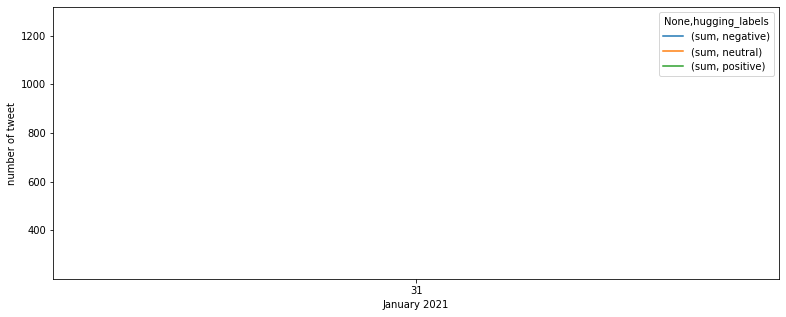

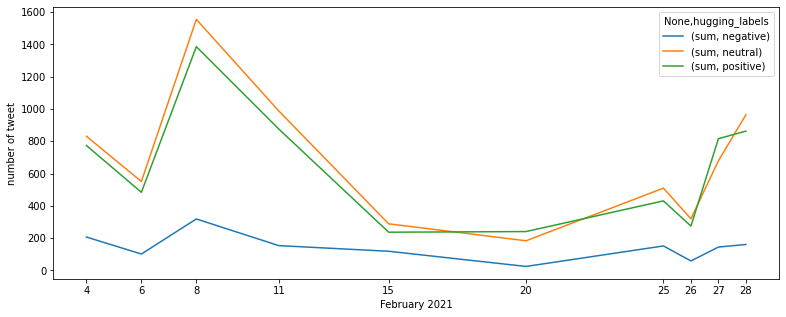

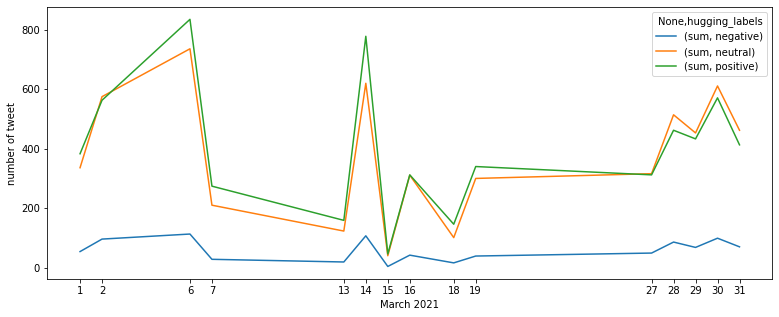

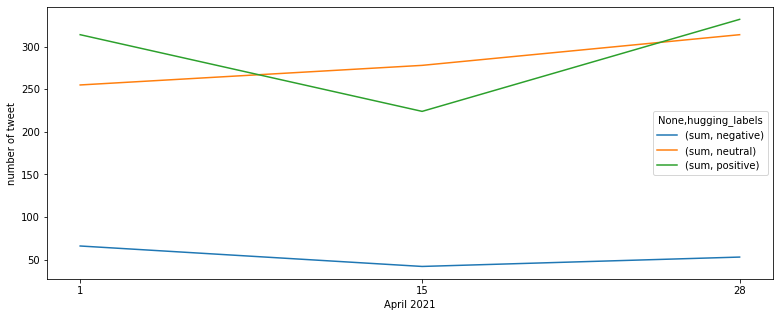

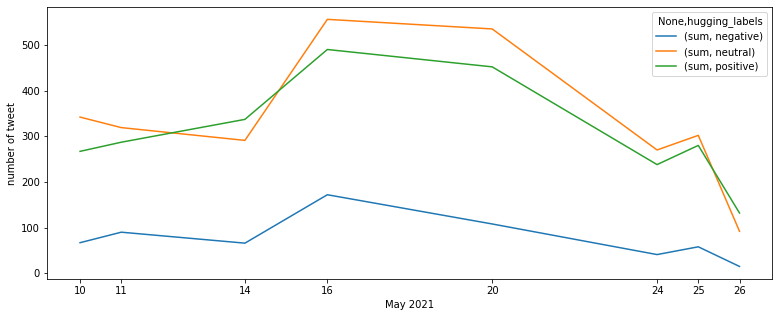

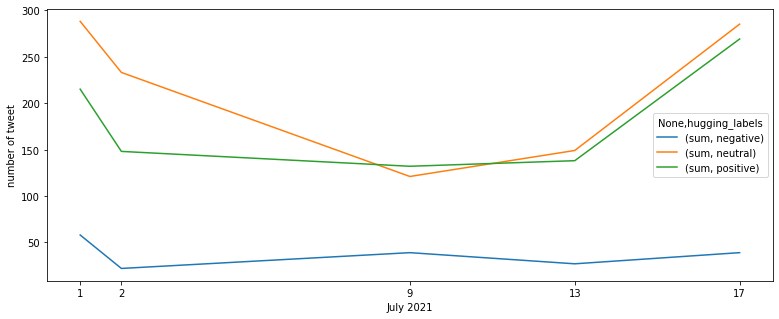

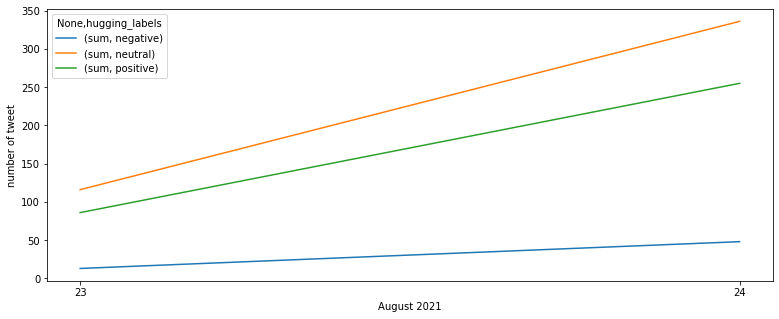

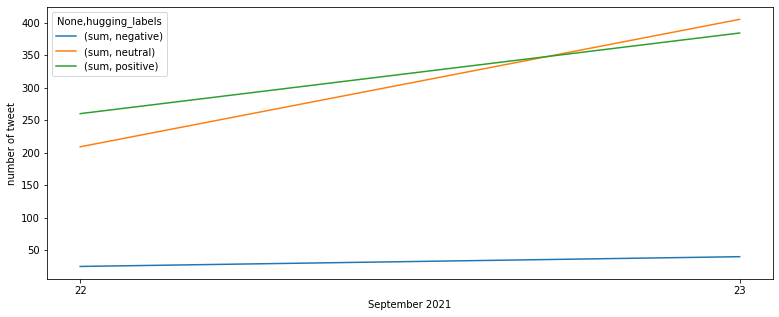

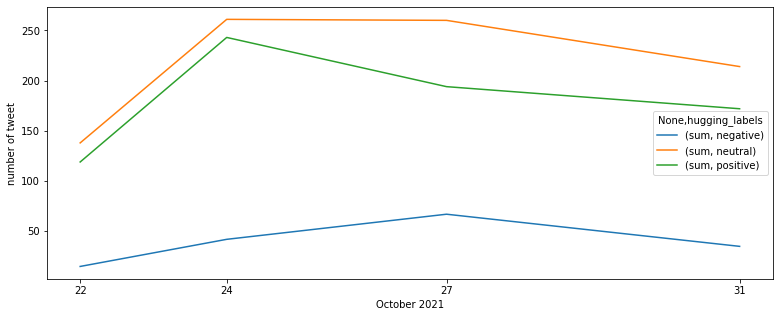

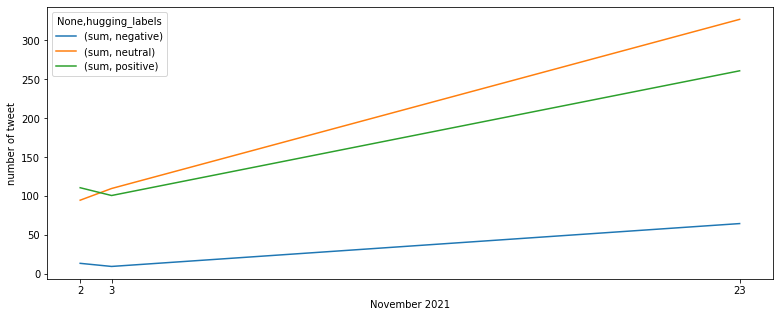

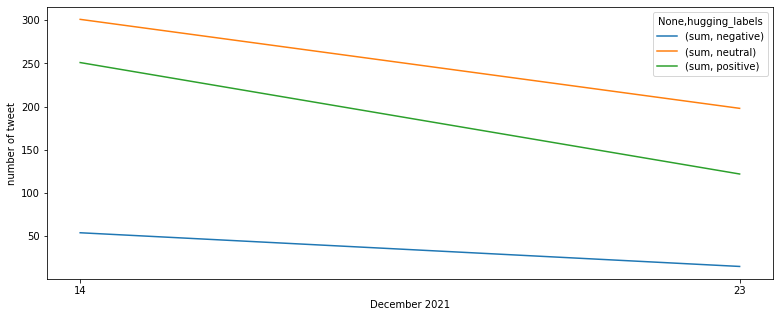

In [11]:
months = {
  1: "January",
  2: "February",
  3: "March",
  4: "April",
  5: "May",
  7: "July",
  8: "August",
  9: "September",
  10: "October",
  11: "November",
  12: "December",
}
def month_label(month_number):
  month_str = months[month_number]
  return month_str + " " + str(this_year)


for i in df_sentiment_by_month.index:
  monthly = df[df.index.month == i]

  aggregation = {'#_of_tweets': ('tweet_id', 'count')}
  df_sentiment_by_time = monthly.groupby(['date', 'hugging_labels']).agg(**aggregation).reset_index()
  
  df_sentiment_by_day = df_sentiment_by_time.groupby(df_sentiment_by_time.date.dt.day).apply(lambda df_sentiment_by_time: df_sentiment_by_time.groupby('hugging_labels')['#_of_tweets'].agg({'sum'})).unstack()

  print(df_sentiment_by_time)
  df_sentiment_by_day.plot(xlabel=month_label(i), xticks=df_sentiment_by_day.index, ylabel="number of tweet", figsize=(13,5))
  